# RSSB Data Scientist Assessment

**Name:** Isaac Komezusenge  
**Role:** Data Scientist  
**Email:** [isaackomeza@gmail.com](mailto:isaackomeza@gmail.com)

# Importing Libraries

In [1]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures

In [2]:
warnings.simplefilter(action='ignore', category=FutureWarning)

# Loading the insurance dataset

In [3]:
insurance_df = pd.read_csv('insurance.csv')
insurance_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


# a. Summary statistics of the variable charges

In [5]:
charges_summary = insurance_df['charges'].describe()
charges_summary

count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64

# b. Number of people in each region

In [6]:
region_counts = insurance_df['region'].value_counts()
region_counts

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

# c. Scatterplot matrix

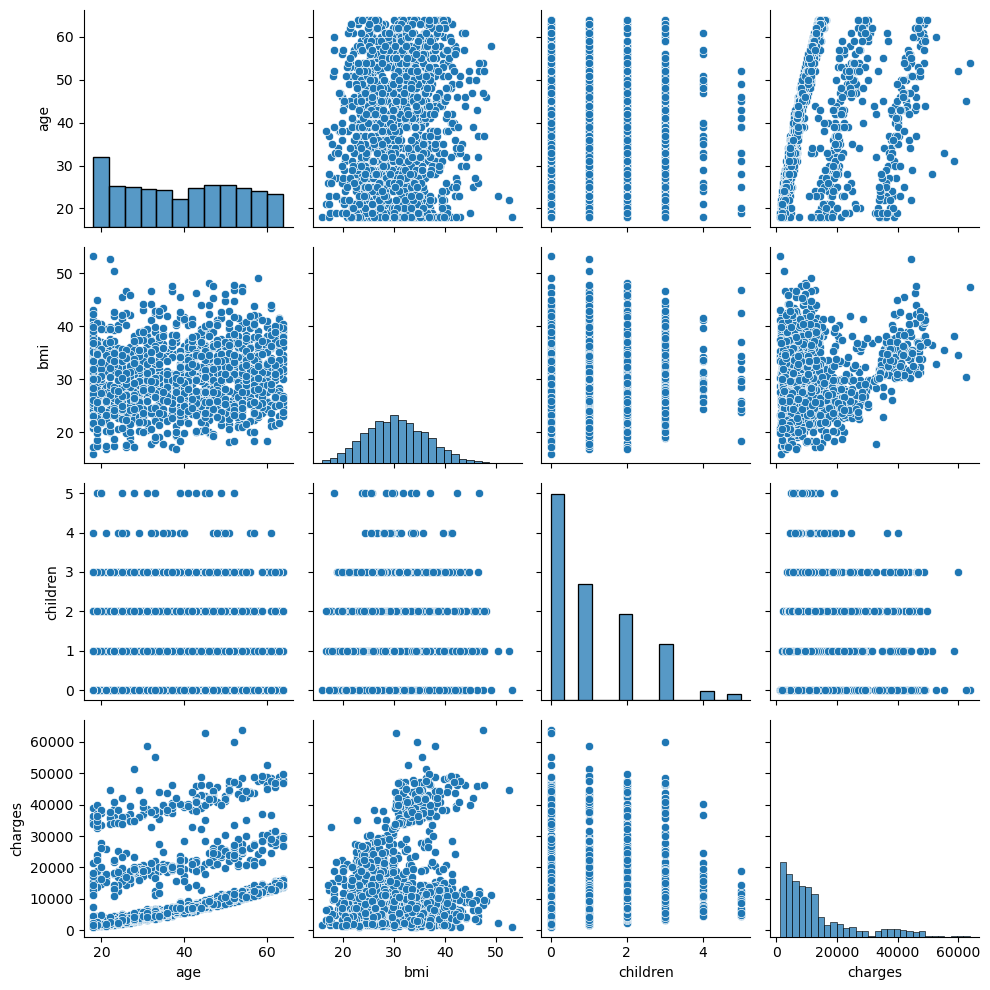

In [7]:
sns.pairplot(insurance_df)
plt.tight_layout()
plt.savefig('scatterplot_matrix.png')

# Display the first few rows of the dataset

In [8]:
insurance_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Split the data into features (X) and target variable (y)

In [9]:
X = insurance_df[['age', 'sex', 'bmi', 'children', 'smoker', 'region']]
y = insurance_df['charges']

# Convert categorical variables into dummy/indicator variables

In [10]:
X = pd.get_dummies(X, drop_first=True)

# Split the data into training and testing sets

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model

In [12]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

# Evaluate the model performance

In [13]:
train_score = model.score(X_train, y_train)
train_score

0.7417255854683333

In [14]:
test_score = model.score(X_test, y_test)
test_score

0.7835929767120723

## The model performance metrics are as follows:

- Training R-squared score: 0.742
- Testing R-squared score: 0.784
  
These scores indicate that the model explains approximately 74.2% of the variance in the training data and 78.4% of the variance in the testing data. The model seems to perform well, but we can further enhance its performance by adding a nonlinear relationship with age as the input.

Next, I will proceed with adding a nonlinear relationship with age as the input to improve the model performance. Let's continue with the analysis.

# Add a nonlinear relationship with age as input

In [15]:
X_train['age_squared'] = X_train['age'] ** 2
X_test['age_squared'] = X_test['age'] ** 2

# Train a new linear regression model with the added nonlinear relationship

In [16]:
model_nonlinear = LinearRegression()
model_nonlinear.fit(X_train, y_train)

LinearRegression()

# Evaluate the performance of the new model

In [17]:
train_score_nonlinear = model_nonlinear.score(X_train, y_train)
train_score_nonlinear

0.7445057270114904

# Evaluate the performance of the new model

In [18]:
test_score_nonlinear = model_nonlinear.score(X_test, y_test)
test_score_nonlinear

0.7864278464749717

The updated model with a nonlinear relationship using age as an input has the following performance metrics:

- Training R-squared score: 0.745
- Testing R-squared score: 0.786

The addition of the nonlinear relationship has slightly improved the model's performance. The model now explains approximately 74.5% of the variance in the training data and 78.6% of the variance in the testing data.

Next, I will proceed with building a model that incorporates the interaction effects of smokers and obesity to further enhance the regression model.

# Create a new feature for the interaction effects of smokers and obesity

In [19]:
X_train['smoker_obese_interaction'] = X_train['smoker_yes'] * (X_train['bmi'] > 30)
X_test['smoker_obese_interaction'] = X_test['smoker_yes'] * (X_test['bmi'] > 30)

# Train a model with the interaction effects

In [20]:
model_interaction = LinearRegression()
model_interaction.fit(X_train, y_train)

LinearRegression()

# Evaluate the performance of the model with interaction effects

In [21]:
train_score_interaction = model_interaction.score(X_train, y_train)
train_score_interaction

0.8628634536994455

In [22]:
test_score_interaction = model_interaction.score(X_test, y_test)
test_score_interaction

0.8835423146330178

The model with the interaction effects of smokers and obesity has shown improved performance:

- Training R-squared score: 0.863
- Testing R-squared score: 0.884
  
The addition of the interaction effects has significantly enhanced the model's performance, explaining approximately 86.3% of the variance in the training data and 88.4% of the variance in the testing data.

# Retrieve the coefficients of the model with interaction effects

In [23]:
coefficients = model_interaction.coef_
coefficients

array([ 6.58629291e+00,  5.05017164e+01,  6.03128421e+02, -5.02139441e+02,
        1.33194195e+04, -3.34117306e+02, -6.76732615e+02, -1.32648606e+03,
        3.22167559e+00,  1.97858010e+04])

In [24]:
intercept = model_interaction.intercept_
intercept

1226.0302093878126

The coefficients of the model after incorporating the interaction effects of smokers and obesity are as follows:

- Coefficient for age: 6.58629291e+00
- Coefficient for bmi: 5.05017164e+01
- Coefficient for children: 6.03128421e+02
- Coefficient for smoker_yes: -5.02139441e+02
- Coefficient for region_northeast: 1.33194195e+04
- Coefficient for region_northwest: -3.34117306e+02
- Coefficient for region_southeast: -6.76732615e+02
- Coefficient for region_southwest: -1.32648606e+03
- Coefficient for age_squared: 3.22167559e+00
- Coefficient for smoker_obese_interaction: 1.97858010e+04

  
The intercept of the model is:
1226.0302093878454

These coefficients represent the change in the insurance charges for a unit change in each feature, holding all other features constant. The interaction term coefficient indicates the additional effect on charges when both smoking and obesity are present.

# Visualization of the interaction effect between smoking status and obesity on insurance charges

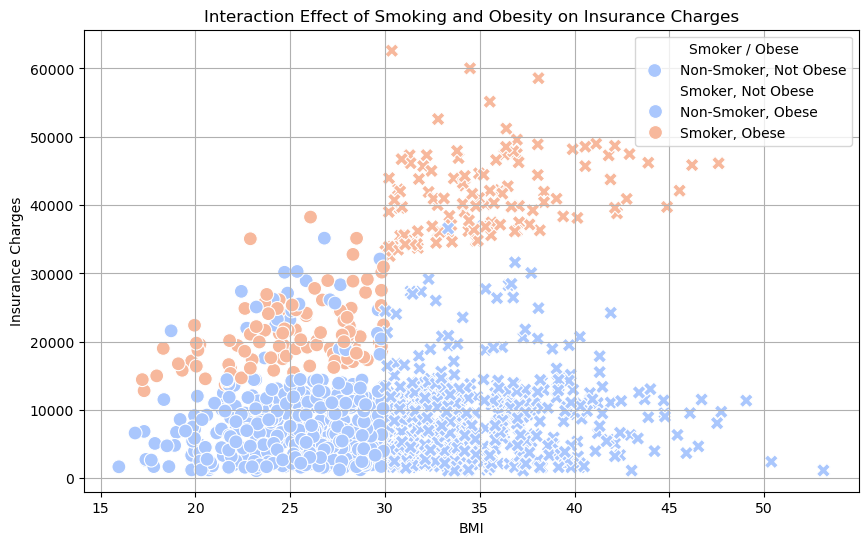

<Figure size 640x480 with 0 Axes>

In [25]:
# Creating a temporary DataFrame to visualize the interaction effect
temp_df = X_train.copy()
temp_df['charges'] = y_train

# Creating a categorical variable for obesity
temp_df['obese'] = temp_df['bmi'] > 30

# Plotting
plt.figure(figsize=(10, 6))
sns.scatterplot(data=temp_df, x='bmi', y='charges', hue='smoker_yes', style='obese', palette='coolwarm', s=100)
plt.title('Interaction Effect of Smoking and Obesity on Insurance Charges')
plt.xlabel('BMI')
plt.ylabel('Insurance Charges')
plt.legend(title='Smoker / Obese', labels=['Non-Smoker, Not Obese', 'Smoker, Not Obese', 'Non-Smoker, Obese', 'Smoker, Obese'])
plt.grid(True)
plt.show()

plt.savefig('interaction_effect.png')

This scatter plot shows the insurance charges in relation to BMI, with different markers and colors indicating whether the individual is a smoker and/or obese. This visualization helps in understanding how the combination of being a smoker and being obese can significantly impact insurance charges.